In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from autoviz.AutoViz_Class import AutoViz_Class
from matplotlib.backends.backend_pdf import PdfPages
import joblib
import pickle
%matplotlib inline
os.chdir(r'C:\Users\YKoyama\OneDrive - Carollo Engineers\General - NAWI 3.13 RO Modeling\Data Request\EDA and Modeling')

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [2]:
df_dict = joblib.load('df_30min_wq_dict.pkl')
df_dict

{'FEED':                             NH3        NTU    EC  ROF TOC  Cl2  pH  \
 Timestamp                                                            
 2022-12-05 00:00:00.000  11.933330  4.203410 NaN   NaN    NaN  NaN   
 2022-12-05 00:30:00.000  12.257180  3.937882 NaN   NaN    NaN  NaN   
 2022-12-05 01:00:00.000  11.135010  3.779921 NaN   NaN    NaN  NaN   
 2022-12-05 01:30:00.000   9.452497  3.485077 NaN   NaN    NaN  NaN   
 2022-12-05 02:00:00.000   8.870444  3.192853 NaN   NaN    NaN  NaN   
 ...                            ...       ...  ..      ...  ...  ..   
 2023-12-03 21:30:00.004  12.117900  4.057817 NaN   NaN    NaN  NaN   
 2023-12-03 22:00:00.004  11.764560  4.047947 NaN   NaN    NaN  NaN   
 2023-12-03 22:30:00.004  11.848670  4.012799 NaN   NaN    NaN  NaN   
 2023-12-03 23:00:00.004  11.157470  3.977652 NaN   NaN    NaN  NaN   
 2023-12-03 23:30:00.004  10.405620  3.942504 NaN   NaN    NaN  NaN   
 
                          Temp (degF)  TOC  Concentrate  EC  Stage 

In [3]:
df_dict.keys()

dict_keys(['FEED', 'ROF', 'C02', 'E01', 'H02'])

In [4]:
df_dict['ROF']

,NH3,NTU,EC,ROF TOC,Cl2,pH,Temp (degF),TOC,Concentrate EC,Stage 1-2 EC,Stage 2-3 EC
Timestamp,,,,,,,,,,,
2022-12-05 00:00:00.000,8.185695,NaN,1601.183960,9.509680,4.387215,6.899232,78.109833,NaN,NaN,NaN,NaN
2022-12-05 00:30:00.000,7.966211,NaN,1593.866943,9.525024,4.388335,6.900168,78.097488,NaN,NaN,NaN,NaN
2022-12-05 01:00:00.000,7.559224,NaN,1592.968018,9.563128,4.389454,6.903358,78.085136,NaN,NaN,NaN,NaN
2022-12-05 01:30:00.000,6.888823,NaN,1585.938965,9.630194,4.390574,6.897070,78.072777,NaN,NaN,NaN,NaN
2022-12-05 02:00:00.000,6.297343,NaN,1578.017944,9.560494,4.322785,6.898346,78.060440,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-03 21:30:00.004,7.286899,NaN,2447.780029,6.884451,3.553078,6.896343,77.746468,NaN,NaN,NaN,NaN
2023-12-03 22:00:00.004,7.090152,NaN,2428.528076,6.908834,3.542489,6.898365,77.705383,NaN,NaN,NaN,NaN
2023-12-03 22:30:00.004,7.457192,NaN,2430.978027,6.944791,3.531900,6.898492,77.664291,NaN,NaN,NaN,NaN


Pearson Correlation Matrix:
                    NH3    NTU     EC      ROF TOC     Cl2       pH     \
NH3              1.000000 NaN   0.251137  0.117260  0.125708  0.040064   
NTU                   NaN NaN        NaN       NaN       NaN       NaN   
EC               0.251137 NaN   1.000000 -0.411648  0.252898 -0.135607   
ROF TOC          0.117260 NaN  -0.411648  1.000000  0.221376 -0.040030   
Cl2              0.125708 NaN   0.252898  0.221376  1.000000  0.031399   
pH               0.040064 NaN  -0.135607 -0.040030  0.031399  1.000000   
Temp (degF)     -0.218289 NaN  -0.157131 -0.406953 -0.544388  0.061348   
TOC                   NaN NaN        NaN       NaN       NaN       NaN   
Concentrate  EC       NaN NaN        NaN       NaN       NaN       NaN   
Stage 1-2  EC         NaN NaN        NaN       NaN       NaN       NaN   
Stage 2-3  EC         NaN NaN        NaN       NaN       NaN       NaN   

                 Temp (degF)  TOC  Concentrate  EC  Stage 1-2  EC  \
NH3           

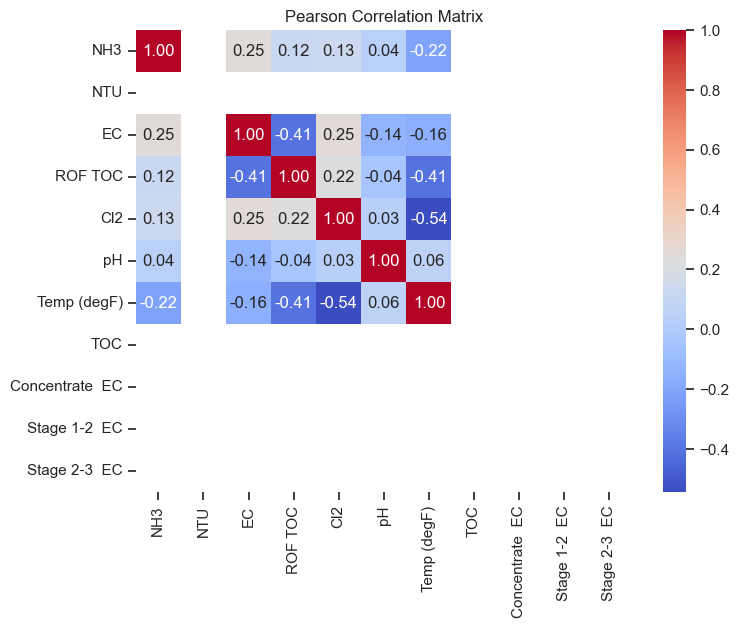

In [9]:
data = df_dict['ROF']
# Calculate Spearman correlation matrix
spearman_corr = data.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(spearman_corr)

# Visualize the Spearman correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()